Estimation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sizes = np.array([12, 17, 6, 9, 7])
sizes

array([12, 17,  6,  9,  7])

In [22]:
sizes=np.sort(sizes)

In [35]:
def percentile(percent,arr):
    arr=np.sort(arr)
    out=(percent/100)*len(arr)
    out=int(out)
    return arr[out]


In [36]:
percentile(70, sizes)

12

In [27]:
scores_and_sections=pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/scores_by_section.csv")
scores_and_sections

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20
...,...,...
354,5,24
355,2,16
356,2,17
357,12,16


<AxesSubplot:>

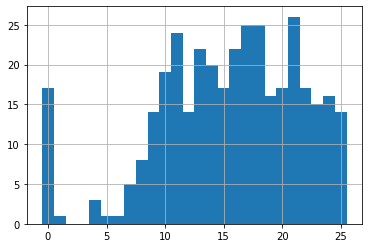

In [29]:
scores_and_sections['Midterm'].hist(bins=np.arange(-0.5, 25.6, 1))

In [33]:
scores = scores_and_sections.Midterm
scores

0      22
1      12
2      23
3      14
4      20
       ..
354    24
355    16
356    17
357    16
358    14
Name: Midterm, Length: 359, dtype: int64

In [37]:
percentile(85, scores)

22

In [38]:
sorted_scores = np.sort(scores_and_sections.Midterm)

In [39]:
0.85 * 359

305.15

In [40]:
# The 306th element of the sorted array

sorted_scores[305]

22

Quartiles

In [41]:
percentile(25, scores)

11

In [42]:
percentile(50, scores)

16

In [43]:
percentile(75, scores)

20

The Bootstrap 

In [44]:
sf2015=pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/san_francisco_2015.csv")
sf2015

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",...,21538,82146.04,0.00,0.00,82146.04,16942.21,12340.88,6337.73,35620.82,117766.86
1,Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12.0,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,...,5459,32165.75,973.19,848.96,33987.90,0.00,4587.51,2634.42,7221.93,41209.83
2,Calendar,2015,4,Community Health,DPH,Public Health,790.0,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",...,41541,71311.00,5757.98,0.00,77068.98,14697.59,12424.50,6370.06,33492.15,110561.13
3,Calendar,2015,4,Community Health,DPH,Public Health,351.0,Municipal Executive Association - Miscellaneous,0900,Management,...,26718,28430.25,0.00,763.07,29193.32,0.00,4223.14,5208.51,9431.65,38624.97
4,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790.0,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,...,45810,7948.75,0.00,0.00,7948.75,0.00,2873.17,616.24,3489.41,11438.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42984,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,200.0,"Transportation Workers, Local 200",9100,Street Transit,...,13250,80691.52,11865.91,3290.29,95847.72,16909.07,12244.02,7788.00,36941.09,132788.81
42985,Calendar,2015,4,Community Health,DPH,Public Health,791.0,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,...,14845,7559.66,0.00,0.00,7559.66,153.74,0.00,2132.23,2285.97,9845.63
42986,Calendar,2015,1,Public Protection,POL,Police,911.0,Police Officers' Association,Q000,Police Services,...,40128,48843.58,2965.85,3316.21,55125.64,11047.55,6212.24,910.16,18169.95,73295.59
42987,Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,39.0,"Stationary Engineers, Local 39",7300,Journeyman Trade,...,48315,16319.20,0.00,0.00,16319.20,0.00,2389.32,1264.85,3654.17,19973.37


In [45]:
sf2015[sf2015['Job']=='Mayor']

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
3335,Calendar,2015,6,General Administration & Finance,MYR,Mayor,556.0,Elected Officials,1100,Administrative & Mgmt (Unrep),...,22433,288963.55,0.0,0.0,288963.55,58117.03,12424.5,20292.95,90834.48,379798.03


In [48]:
sf2015['Total Compensation'].sort_values(ascending=True)

27308      -423.76
15746      -410.61
24576      -159.12
42982       -26.53
23310        -9.51
           ...    
5171     422799.94
17805    426686.07
499      427219.28
13194    480509.28
19177    648875.24
Name: Total Compensation, Length: 42989, dtype: float64

In [49]:
sf2015 = sf2015[sf2015['Salaries'] > 10000]
sf2015

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",...,21538,82146.04,0.00,0.00,82146.04,16942.21,12340.88,6337.73,35620.82,117766.86
1,Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12.0,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,...,5459,32165.75,973.19,848.96,33987.90,0.00,4587.51,2634.42,7221.93,41209.83
2,Calendar,2015,4,Community Health,DPH,Public Health,790.0,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",...,41541,71311.00,5757.98,0.00,77068.98,14697.59,12424.50,6370.06,33492.15,110561.13
3,Calendar,2015,4,Community Health,DPH,Public Health,351.0,Municipal Executive Association - Miscellaneous,0900,Management,...,26718,28430.25,0.00,763.07,29193.32,0.00,4223.14,5208.51,9431.65,38624.97
6,Calendar,2015,4,Community Health,DPH,Public Health,791.0,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,...,7506,187247.00,0.00,11704.06,198951.06,37683.66,12424.50,11221.73,61329.89,260280.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42983,Calendar,2015,1,Public Protection,JUV,Juvenile Probation,790.0,"SEIU - Miscellaneous, Local 1021",9700,Community Development,...,49719,42793.30,0.00,0.00,42793.30,8506.93,6731.93,3317.55,18556.41,61349.71
42984,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,200.0,"Transportation Workers, Local 200",9100,Street Transit,...,13250,80691.52,11865.91,3290.29,95847.72,16909.07,12244.02,7788.00,36941.09,132788.81
42986,Calendar,2015,1,Public Protection,POL,Police,911.0,Police Officers' Association,Q000,Police Services,...,40128,48843.58,2965.85,3316.21,55125.64,11047.55,6212.24,910.16,18169.95,73295.59
42987,Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,39.0,"Stationary Engineers, Local 39",7300,Journeyman Trade,...,48315,16319.20,0.00,0.00,16319.20,0.00,2389.32,1264.85,3654.17,19973.37


In [50]:
len(sf2015)

36569

Population and Parameter

<AxesSubplot:>

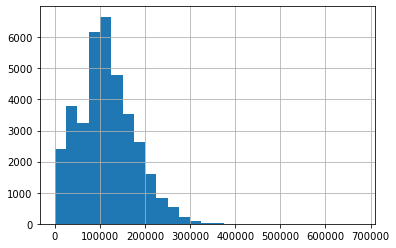

In [51]:
sf_bins = np.arange(0, 700000, 25000)
sf2015['Total Compensation'].hist(bins=sf_bins)

In [53]:
sf2015['Total Compensation'].sort_values(ascending=False)

19177    648875.24
13194    480509.28
499      427219.28
17805    426686.07
5171     422799.94
           ...    
18649     11330.76
33927     11280.91
38410     11198.23
28396     11139.84
20130     11050.68
Name: Total Compensation, Length: 36569, dtype: float64

In [54]:
pop_median = percentile(50, sf2015['Total Compensation'])
pop_median

110305.79

A Random Sample and an Estimate 

Text(0.5, 0, 'Total Compensation')

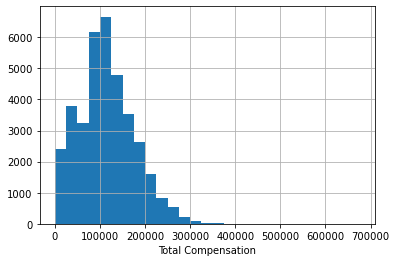

In [60]:
our_sample = sf2015.sample(frac=1)
our_sample['Total Compensation'].hist(bins=sf_bins)
#plt.ylabel("Percent per Unit")
plt.xlabel("Total Compensation")

In [80]:
est_median = percentile(50, our_sample['Total Compensation'])
est_median
#our_sample['Total Compensation'].median()

110305.79

In [87]:
resample_1 = our_sample.sample(frac=1,replace=True)
#resample_1

Text(0.5, 0, 'Total Compensation')

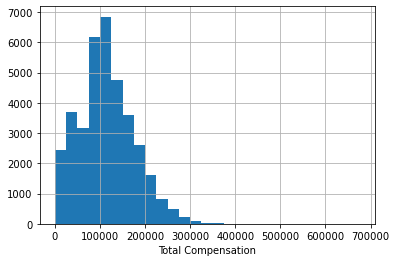

In [88]:
resample_1['Total Compensation'].hist(bins=sf_bins)
plt.xlabel("Total Compensation")

In [89]:
resampled_median_1 = percentile(50, resample_1['Total Compensation'])
resampled_median_1

110537.05

In [90]:
resample_2 = our_sample.sample(frac=1,replace=True)
resampled_median_2 = percentile(50, resample_2['Total Compensation'])
resampled_median_2

110245.73

Bootstrap Empirical Distribution of the Sample Median

In [94]:
def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample[label]
    medians = np.array([])
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample(frac=1,replace=True)
        resampled_median = percentile(50, bootstrap_sample)
        medians = np.append(medians, resampled_median)
        
    return medians

In [98]:
bstrap_medians = bootstrap_median(our_sample, 'Total Compensation', 5000)

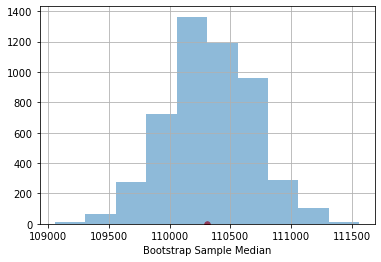

In [112]:
bstrap_medians.hist(alpha=0.5)
plt.xlabel("Bootstrap Sample Median")
plt.scatter(pop_median, 0, color='red', s=30)

In [113]:
left = percentile(2.5, bstrap_medians)
left

109642.71

In [114]:
right = percentile(97.5, bstrap_medians)
right

111057.08

Text(0, 0.5, 'Percent Per Unit')

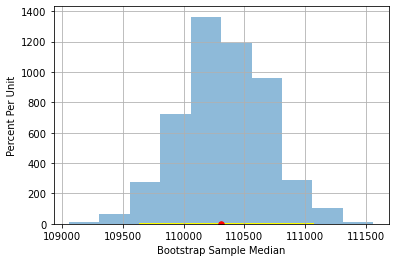

In [120]:
bstrap_medians.hist(alpha=0.5)
plt.plot([left, right], [0, 0], color='yellow', lw=3, zorder=1)
plt.scatter(pop_median, 0, color='red', s=30, zorder=2)
plt.xlabel("Bootstrap Sample Median")
plt.ylabel("Percent Per Unit")

In [125]:
sf2015[["Total Compensation"]]

,Total Compensation
0,117766.86
1,41209.83
2,110561.13
3,38624.97
6,260280.95
...,...
42983,61349.71
42984,132788.81
42986,73295.59
42987,19973.37


In [127]:
# THE BIG SIMULATION: This one takes several minutes.

# Generate 100 intervals, in the table intervals

left_ends = np.array([])
right_ends = np.array([])

total_comps = sf2015[['Total Compensation']]

for i in np.arange(100):
    first_sample = total_comps.sample(500, replace=False)
    medians = bootstrap_median(first_sample, 'Total Compensation', 5000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

intervals = pd.DataFrame({
    'Left': left_ends,
    'Right': right_ends  }
)    

In [128]:
intervals

,Left,Right
0,106927.88,118642.98
1,102875.61,115120.20
2,102549.12,113742.99
3,106440.00,119232.16
4,105999.24,116291.92
...,...,...
95,106331.28,116862.65
96,102968.93,118042.53
97,104633.42,115509.18
98,105877.31,116766.69


In [129]:
pop_median

110305.79

In [133]:
len(intervals[np.logical_and(intervals['Left']<pop_median,intervals['Right']>pop_median)])

97

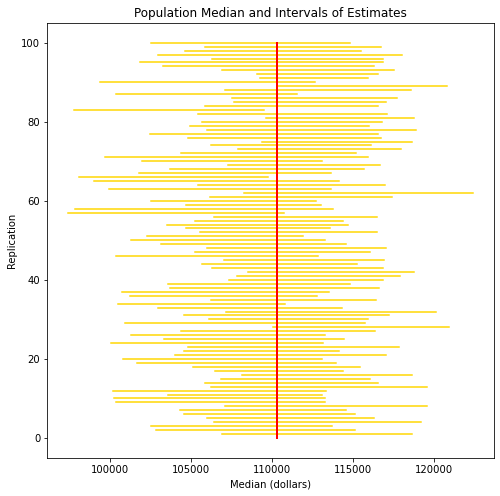

In [137]:
# HIDDEN 

replication_number = np.ndarray.astype(np.arange(1, 101), str)
intervals2 = pd.DataFrame([left_ends, right_ends])

plt.figure(figsize=(8,8))
for i in np.arange(100):
    ends = intervals2.iloc[:,i]
    plt.plot(ends, [i+1, i+1], color='gold')
plt.plot([pop_median, pop_median], [0, 100], color='red', lw=2)
plt.xlabel('Median (dollars)')
plt.ylabel('Replication')
plt.title('Population Median and Intervals of Estimates');

Confidence Intervals

In [168]:
baby = pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/baby.csv")
baby

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


In [169]:
ratios = baby[['Birth Weight', 'Gestational Days']]
ratios["Ratio BW/GD"]=baby['Birth Weight']/baby['Gestational Days']
ratios

<ipython-input-169-7db05bd2307b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratios["Ratio BW/GD"]=baby['Birth Weight']/baby['Gestational Days']


,Birth Weight,Gestational Days,Ratio BW/GD
0,120,284,0.422535
1,113,282,0.400709
2,128,279,0.458781
3,108,282,0.382979
4,136,286,0.475524
...,...,...,...
1169,113,275,0.410909
1170,128,265,0.483019
1171,130,291,0.446735
1172,125,281,0.444840


<AxesSubplot:>

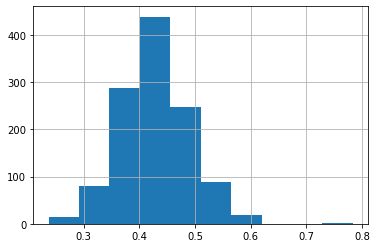

In [145]:
ratios['Ratio BW/GD'].hist()

In [178]:
ratios.sort_values(by="Ratio BW/GD",ascending=False).iloc[0,:]

Birth Weight        116.000000
Gestational Days    148.000000
Ratio BW/GD           0.783784
Name: 238, dtype: float64

In [179]:
np.median(ratios['Ratio BW/GD'])

0.42907801418439717

In [180]:
def bootstrap_median(original_sample, label, replications):
   
    just_one_column = original_sample[label]
    medians = np.array([])
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample(frac=1,replace=True)
        resampled_median = percentile(50, bootstrap_sample)
        medians = np.append(medians, resampled_median)
        
    return medians

In [181]:
# Generate the medians from 5000 bootstrap samples
bstrap_medians = bootstrap_median(ratios, 'Ratio BW/GD', 5000)

In [182]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)

pd.DataFrame([left, right])

,0
0,0.425743
1,0.432727


Text(0, 0.5, 'Percent Per Unit')

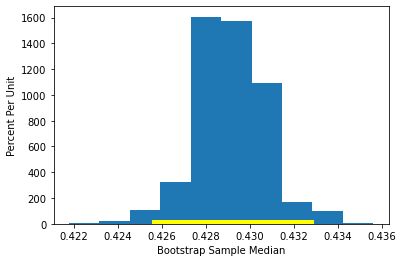

In [188]:
plt.hist(bstrap_medians)
plt.plot([left, right],[0, 0], color='yellow', lw=8)
plt.xlabel("Bootstrap Sample Median")
plt.ylabel("Percent Per Unit")

Confidence Interval for a Population Mean: Bootstrap Percentile Method 

Text(0.5, 0, 'Maternal Age')

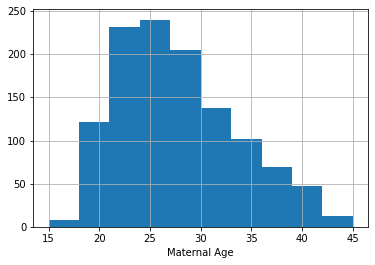

In [191]:
baby['Maternal Age'].hist()
plt.xlabel("Maternal Age")

In [192]:
baby['Maternal Age'].mean()

27.228279386712096

In [193]:
def bootstrap_mean(original_sample, label, replications):
   
    just_one_column = original_sample[label]
    means = np.array([])
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample(frac=1,replace=True)
        resampled_mean = bootstrap_sample.mean()
        means = np.append(means, resampled_mean)
        
    return means

In [195]:
bstrap_means = bootstrap_mean(baby, 'Maternal Age', 5000)
bstrap_means 


array([27.31431005, 27.09540034, 27.26831346, ..., 27.4011925 ,
       27.12947189, 27.5528109 ])

In [198]:
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

[left,right]

[26.896081771720613, 27.561328790459967]

Text(0, 0.5, 'Percent per Unit')

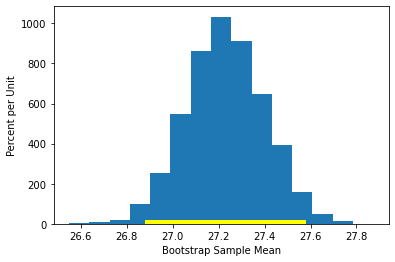

In [202]:
plt.hist(bstrap_means,bins=15)
plt.plot([left, right], [0, 0], color='yellow', lw=8)
plt.xlabel("Bootstrap Sample Mean")
plt.ylabel("Percent per Unit")

Text(0.5, 0, 'Maternal Age')

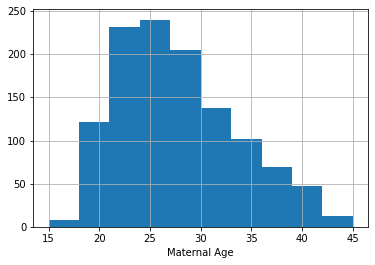

In [204]:
baby['Maternal Age'].hist()
plt.xlabel("Maternal Age")

An 80% Confidence Interval 

In [205]:
left_80 = percentile(10, bstrap_means)
right_80 = percentile(90, bstrap_means)
[left_80, right_80]

[27.015332197614992, 27.45144804088586]

Text(0, 0.5, 'Percent per Unit')

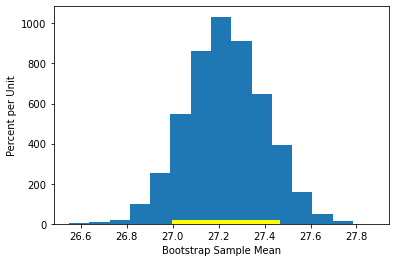

In [208]:
plt.hist(bstrap_means,bins=15)
plt.plot([left_80, right_80], [0, 0], color='yellow', lw=8)
plt.xlabel("Bootstrap Sample Mean")
plt.ylabel("Percent per Unit")

Confidence Interval for a Population Proportion: Bootstrap Percentile Method

In [219]:
len(baby[baby['Maternal Smoker']==True])/len(baby)

0.3909710391822828

In [220]:
smoking = baby['Maternal Smoker']
np.count_nonzero(smoking)/len(smoking)

0.3909710391822828

In [223]:
def bootstrap_proportion(original_sample, label, replications):
   
    just_one_column = original_sample[label]
    proportions = np.array([])
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample(frac=1,replace=True)
        resampled_proportion = np.count_nonzero(bootstrap_sample)/len(bootstrap_sample)
        proportions = np.append(proportions, resampled_proportion)
        
        
    return proportions 

In [224]:
bstrap_props = bootstrap_proportion(baby, 'Maternal Smoker', 5000)


In [227]:
left = percentile(2.5, bstrap_props)
right = percentile(97.5, bstrap_props)
[left,right]

[0.3628620102214651, 0.4182282793867121]

Text(0, 0.5, 'Percent per Unit')

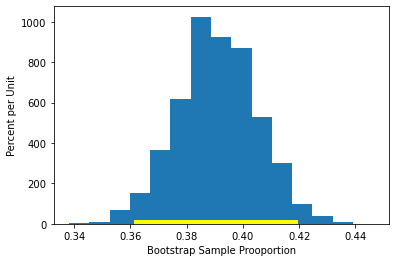

In [228]:
plt.hist(bstrap_props,bins=15)
plt.plot([left, right], [0, 0], color='yellow', lw=8)
plt.xlabel("Bootstrap Sample Proportion")
plt.ylabel("Percent per Unit")

In [231]:
def bootstrap_median(original_sample, label, replications):
   
    just_one_column = original_sample[label]
    medians = np.array([])
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample(frac=1,replace=True)
        resampled_median = percentile(50, bootstrap_sample)
        medians = np.append(medians, resampled_median)
        
    return medians

In [232]:
def bootstrap_mean(original_sample, label, replications):
   
    just_one_column = original_sample[label]
    means = np.array([])
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample(frac=1,replace=True)
        resampled_mean = bootstrap_sample.mean()
        means = np.append(means, resampled_mean)
        
    return means

In [233]:
def bootstrap_proportion(original_sample, label, replications):
   
    just_one_column = original_sample[label]
    proportions = np.array([])
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample(frac=1,replace=True)
        resampled_proportion = np.count_nonzero(bootstrap_sample)/len(bootstrap_sample)
        proportions = np.append(proportions, resampled_proportion)
        
        
    return proportions 

Using Confidence Intervals

In [234]:
baby = pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/baby.csv")
baby

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


Text(0.5, 0, 'Maternal Age')

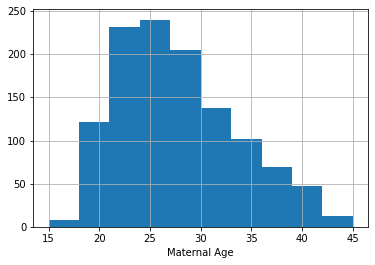

In [238]:
baby['Maternal Age'].hist()
plt.xlabel("Maternal Age")

In [239]:
hodgkins = pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/hodgkins.csv")
hodgkins

,height,rad,chemo,base,month15
0,164,679,180,160.57,87.77
1,168,311,180,98.24,67.62
2,173,388,239,129.04,133.33
3,157,370,168,85.41,81.28
4,160,468,151,67.94,79.26
5,170,341,96,150.51,80.97
6,163,453,134,129.88,69.24
7,175,529,264,87.45,56.48
8,185,392,240,149.84,106.99
9,178,479,216,92.24,73.43


In [240]:
hodgkins['drop']= hodgkins['base'] - hodgkins['month15']
hodgkins

,height,rad,chemo,base,month15,drop
0,164,679,180,160.57,87.77,72.80
1,168,311,180,98.24,67.62,30.62
2,173,388,239,129.04,133.33,-4.29
3,157,370,168,85.41,81.28,4.13
4,160,468,151,67.94,79.26,-11.32
5,170,341,96,150.51,80.97,69.54
6,163,453,134,129.88,69.24,60.64
7,175,529,264,87.45,56.48,30.97
8,185,392,240,149.84,106.99,42.85
9,178,479,216,92.24,73.43,18.81


Text(0, 0.5, 'Percent per Unit')

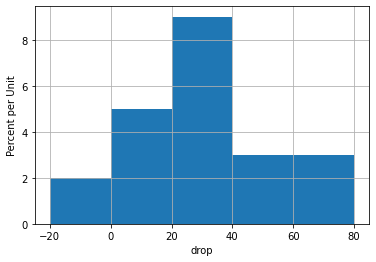

In [243]:
hodgkins['drop'].hist(bins=np.arange(-20, 81, 20))
plt.xlabel("drop")
plt.ylabel("Percent per Unit")

In [244]:
np.mean(hodgkins['drop'])

28.615909090909096

In [245]:
bstrap_means = bootstrap_mean(hodgkins, 'drop', 10000)

left = percentile(0.5, bstrap_means)
right = percentile(99.5, bstrap_means)

[left, right]

[16.974545454545453, 40.547727272727265]

Text(0, 0.5, 'Percent per Unit')

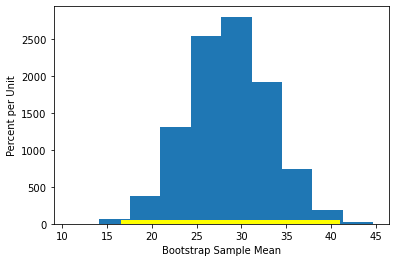

In [249]:
plt.hist(bstrap_means)
plt.plot([left, right], [0, 0], color='yellow', lw=8)
plt.xlabel("Bootstrap Sample Mean")
plt.ylabel("Percent per Unit")

Chapter 13 Completed